<h1 style="text-align:center;text-decoration:underline;color:#B45F04">TASK 3 : Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’</h1>

### As part of Graduate Rotational Internship Program (GRIP) @ The Sparks Foundation 
### Author: Ribin Baby
* Question: <span style="background-color: #FFFF00"> As a business manager, try to find out the weak areas where you can work to make more profit. What all business problems you can derive by exploring the data?</span>

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# loading Data
path = 'datas/SampleSuperstore.csv'
retail_df = pd.read_csv(path)
print("Shape of dataframe:", retail_df.shape)
retail_df.head()

Shape of dataframe: (9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# checking for null values
# no null value is prescent
retail_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# checking for duplicate values
retail_df.duplicated().sum()

17

In [6]:
# dropping duplicate values
# because duplicate values are prescent in our datatset
retail_df.drop_duplicates(inplace=True)

In [7]:
# number of observations 
retail_df.shape

(9977, 13)

In [8]:
# `Postal Code` is unnecessary column in our dataset so we can drop this column
retail_df.drop(columns='Postal Code', axis=1, inplace=True)

In [9]:
# checking datatypes of columns
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1013.3+ KB


* 1) object/string, integer and floating point values are prescent
* 2) there are 13 columns in the dataset
* 3) no missing values are prescent 

## Descriptive Statistics
* This allow us to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values

In [10]:
# on numerical features/variables
retail_df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [11]:
# on categorical features/variables
retail_df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


<u>numerical data</u>
* 1) `Sales`, `Quantity`, `Discount` and `Profit` contains skewness in data.
<br>
<u>categorical data</u>
* 1) only one `Country` data is available.
* 2) datas is collected from 531 cities belonging to 49 states in U.S.A
* 3) There are mainly 3 `Category` of products with 17 additional `Sub-Category`.
* 4) 4 modes of Shipping is adopted
* 5) 3 customer `Segment`s are there

## Data Visualization

### 1) Correlation Metrix

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

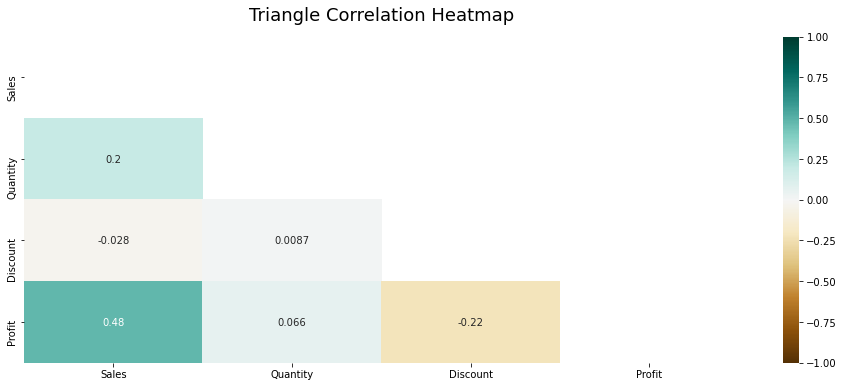

In [12]:
# correlation metrix

plt.figure(figsize=(16, 6))  

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(retail_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(retail_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

* 1) There is large +ve correlation between `Profit` and `Sales`
* 2) There is -ve correlation between `Profit` and `Discount`
* 3) And also there is a +ve correlation between `Sales` and `Quantity`

### 2) Skewness and outliers

In [13]:
numeric_features = retail_df.select_dtypes(include=np.number).columns
categorical_features = retail_df.select_dtypes(include='object').columns

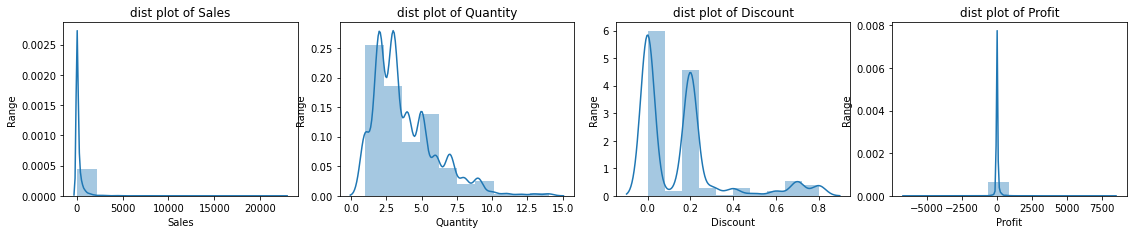

In [14]:
# distribution plot
fig, ax = plt.subplots(ncols=len(numeric_features), figsize=(15.5,3))
fig.tight_layout(h_pad=4)
palette = sns.color_palette("pastel")

for i, col_name in enumerate(numeric_features):
    sns.distplot(retail_df[col_name], ax=ax[i], bins=10)
    ax[i].set_title('dist plot of '+str(col_name))
    ax[i].set_xlabel(col_name)
    ax[i].set_ylabel('Range')
plt.show()

* 1) from the Distribution plot prescence of Skweness can be noted.
* 2) `Sales` and `Profit` have lower varience
* 3) `Quantity` and `Discount` have right skewness
* 4) `Discount` is bimodal in nature

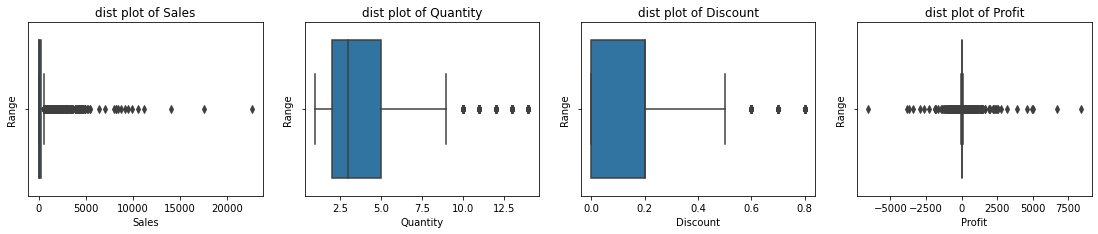

In [15]:
fig, ax = plt.subplots(ncols=len(numeric_features), figsize=(15.5,3))
fig.tight_layout(h_pad=4)
palette = sns.color_palette("pastel")

for i, col_name in enumerate(numeric_features):
    sns.boxplot(retail_df[col_name], ax=ax[i])
    ax[i].set_title('dist plot of '+str(col_name))
    ax[i].set_xlabel(col_name)
    ax[i].set_ylabel('Range')
plt.show()

### 3) EDA

In [16]:
# lambda function
sales_profit = lambda x,y: retail_df.groupby(x)[y].sum().sort_values(ascending=False)
discount = lambda x,y: retail_df.groupby(x)[y].mean().sort_values(ascending=False)

In [17]:
# function to plot barplot as subplot. to be used in the following cells for visualization
def plot_xy(x:str, y:str, df, sub=111, rotate=False, mode='sum'):    # modes-> sum, mean
    plt.subplot(sub)
    if mode=='mean':
        sns.barplot(x=discount(x, y).index, y=discount(x, y).values*100)
    elif mode=='sum': 
        sns.barplot(x=sales_profit(x, y).index, y=sales_profit(x, y).values)
    #sns.barplot(x=x, y=y, data=df, ci=False)
    if rotate:
        plt.xticks(rotation=90)
    plt.ylabel(y)

In [18]:
# function to plot pieChart and countplot as subplot to be used in the following cells
def plot_pieBar(col:str, df, rotate=False, pie=True, bar=True, sub=121, hue_='Region'):
    # sub = 121
    if bar:
        plt.subplot(sub)
        sns.countplot(x=col, data=df, hue=hue_, palette='rocket_r')
        if rotate:
            plt.xticks(rotation=90)
        plt.title(col+" V/S "+hue_)
        sub = sub+1
    #-----------------------------------
    if pie:
        plt.subplot(sub)
        plt.title(col+" distrbution")
        df[col].value_counts().plot.pie(autopct="%.1f%%")

#### 1) Segment V/S Region/Profit/Sales/Quantity/Discount

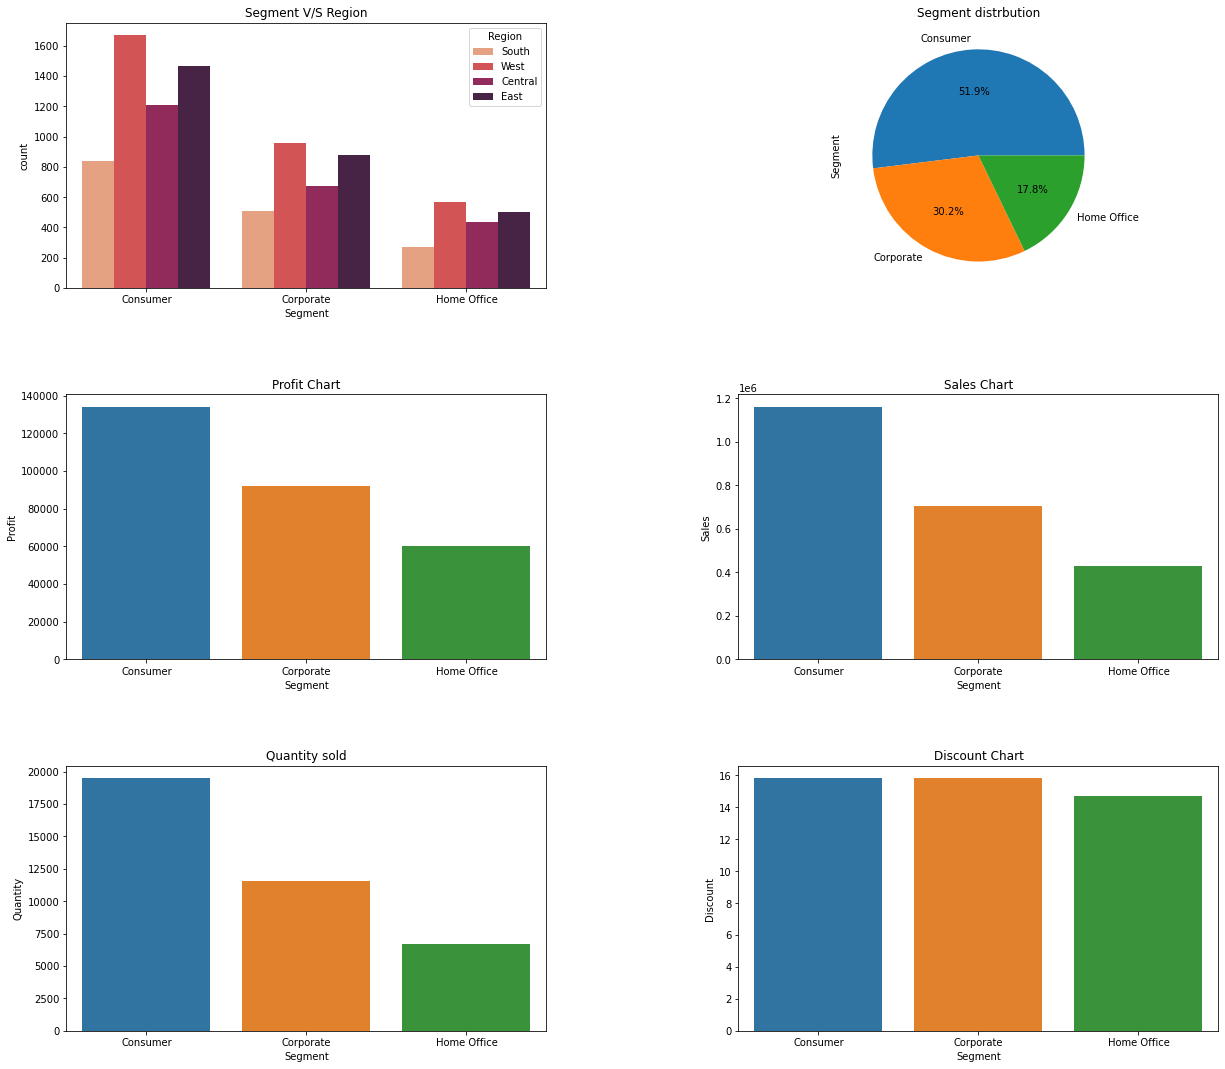

In [19]:
# visualizing the customer `Segments`
plt.figure(figsize=(20,10))
plot_pieBar(col='Segment', df=retail_df, hue_='Region', sub=321)
#------------------------------------
plot_xy(x='Segment', y='Profit', df=retail_df, sub=323)
plt.title('Profit Chart')
#------------------------------------
plot_xy(x='Segment', y='Sales', df=retail_df, sub=324)
plt.title('Sales Chart')
#------------------------------------
plot_xy(x='Segment', y='Quantity', df=retail_df, sub=325)
plt.title('Quantity sold')
#------------------------------------
plot_xy(x='Segment', y='Discount', df=retail_df, sub=326, mode='mean')
plt.title('Discount Chart')
# set the spacing between subplots 
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=1.5,  
                    wspace=0.4,  
                    hspace=0.4) 
plt.show()

* 1) There are 3 customer Segments
* 2) more number of activities are prescent in `Consumer` segment, and less for `Home Office` segment
* 3) `Consumer` segment is making more profit and is also more in Sales
* 4) more discounts are given to `Consumer` segments.

#### 2) Category V/S Region/Profit/Sales/Quantity/Discount

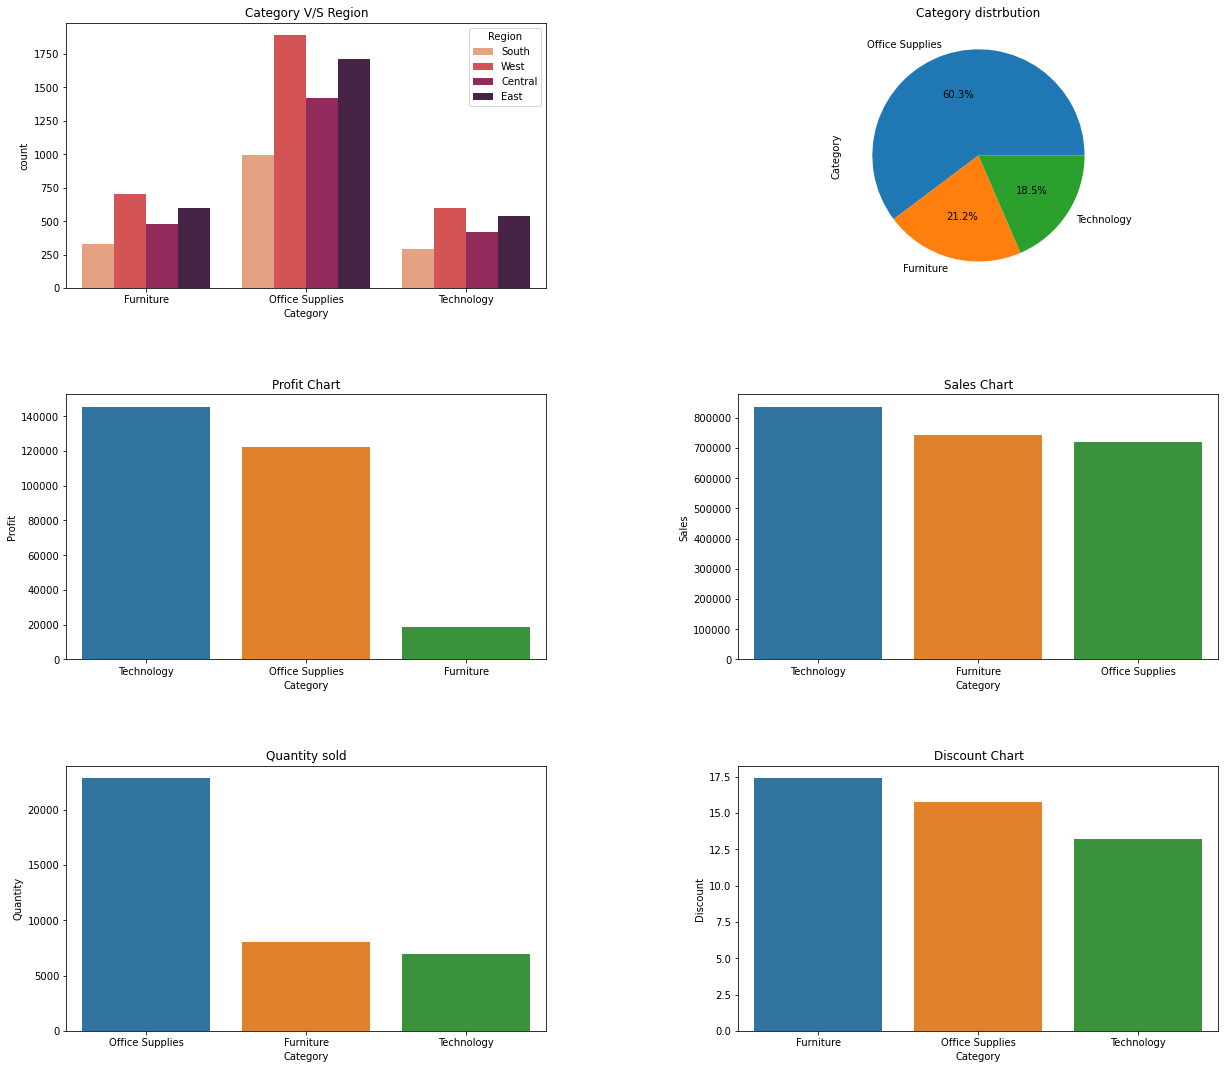

In [20]:
# visualizing the categories of goods
plt.figure(figsize=(20,10))
plot_pieBar(col='Category', df=retail_df, hue_='Region', sub=321)
#------------------------------------
plot_xy(x='Category', y='Profit', df=retail_df, sub=323)
plt.title('Profit Chart')
#------------------------------------
plot_xy(x='Category', y='Sales', df=retail_df, sub=324)
plt.title('Sales Chart')
#------------------------------------
plot_xy(x='Category', y='Quantity', df=retail_df, sub=325)
plt.title('Quantity sold')
#------------------------------------
plot_xy(x='Category', y='Discount', df=retail_df, sub=326, mode='mean')
plt.title('Discount Chart')
#------------------------------------
# set the spacing between subplots 
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=1.5,  
                    wspace=0.4,  
                    hspace=0.4) 
plt.show()

* 1) There is large demand for `Office Goods` and low demand for `Technological` Goods
* 2) There is high demand/(# deals) for `Office Supplies` but the category `Technology` is making more Sales and Profit.
* 3) `Office Supplies` are sold in large quantities
* 4) `Furniture` category is given more discounts

### 3) Sub-Category V/S Region/Category/Profit/Sales/Quantity/Discount

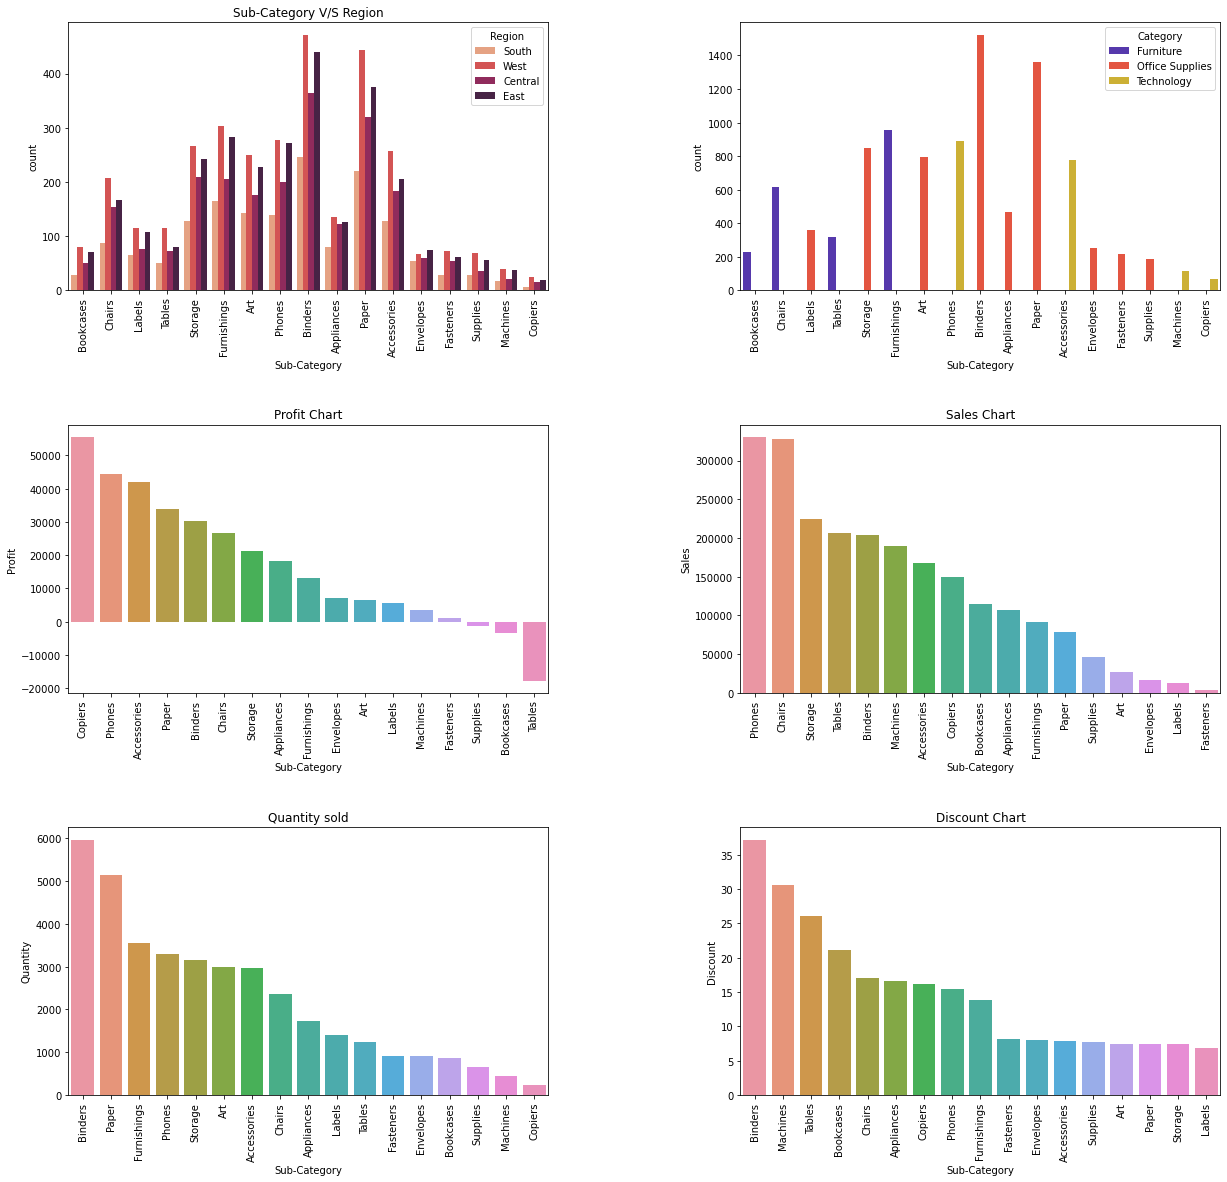

In [21]:
# visualizing Sub-category
plt.figure(figsize=(20,10))
plot_pieBar(col='Sub-Category', df=retail_df, rotate=True, pie=False, hue_='Region', sub=321)
#------------------------------------
plt.subplot(322)
sns.countplot(x='Sub-Category', data=retail_df, hue='Category', palette='CMRmap')
plt.xticks(rotation=90)
#------------------------------------
plot_xy(x='Sub-Category', y='Profit', df=retail_df, sub=323, rotate=True)
plt.title('Profit Chart')
#------------------------------------
plot_xy(x='Sub-Category', y='Sales', df=retail_df, sub=324, rotate=True)
plt.title('Sales Chart')
#------------------------------------
plot_xy(x='Sub-Category', y='Quantity', df=retail_df, sub=325, rotate=True)
plt.title('Quantity sold')
#------------------------------------
plot_xy(x='Sub-Category', y='Discount', df=retail_df, sub=326, mode='mean', rotate=True)
plt.title('Discount Chart')
#------------------------------------
# set the spacing between subplots 
plt.subplots_adjust(left=0.1, 
                    bottom=0.01,  
                    right=0.9,  
                    top=1.5,  
                    wspace=0.4,  
                    hspace=0.5) 
plt.show()

* 1) `Binders` are in large demand(more # deals) and `Copiers` are in lesser demand
* 2) Category and Sub-Categories
* ---> Furniture: #1 `Bookcase`, #2 `Chairs`, #3 `Tables`, #4 `Furnishings`
* ---> Office Supplies: #1 `Labels`, #2 `Storage`, #3 `Art`, #4 `Binders`, #5 `Appliences`, #6 `Paper`, #7 `Envelopes`, #8 `Fasteners`, #9 `Supplies`
* ---> Technology: #1 `Phones`, #2 `Accessories`, #3 `Machines`, #4 `Copiers`
* 3) `Binders` and `Paper` are sold in large Quantities but `Copiers` are making higher profits within the sub-categories.
* 4) `phones` and `chairs` have higher sales.
* 5) more discounts are given to `Binders` and `Machines`

### 4) Ship Mode V/S Region/Profit/Sales/Quantity/Discount

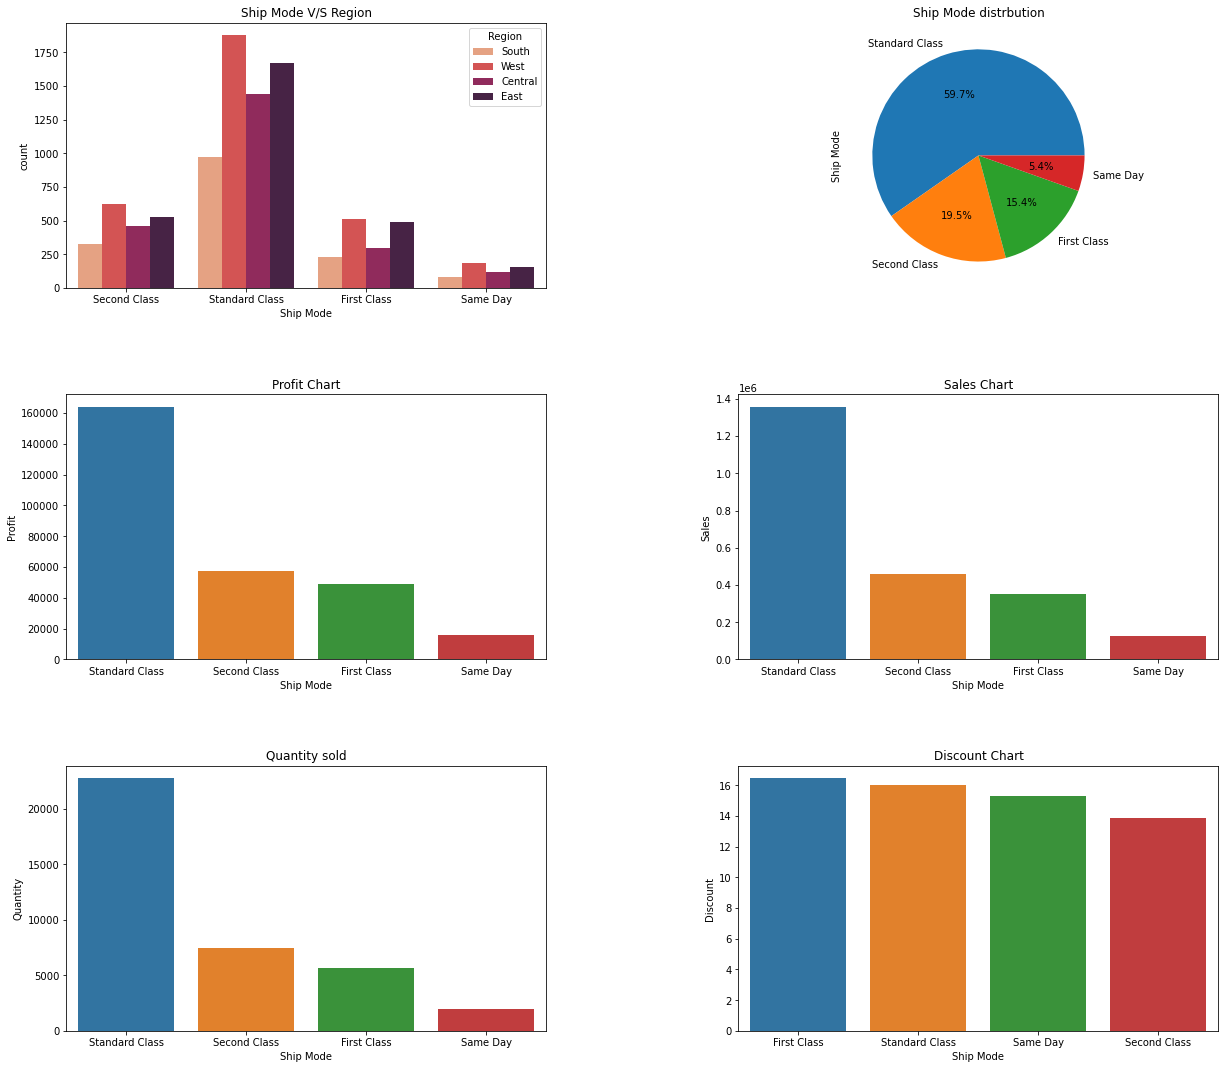

In [22]:
# visualizing activities in different Shipping Modes
plt.figure(figsize=(20,10))
plot_pieBar(col='Ship Mode', df=retail_df, hue_='Region', sub=321)
#------------------------------------
plot_xy(x='Ship Mode', y='Profit', df=retail_df, sub=323)
plt.title('Profit Chart')
#------------------------------------
plot_xy(x='Ship Mode', y='Sales', df=retail_df, sub=324)
plt.title('Sales Chart')
#------------------------------------
plot_xy(x='Ship Mode', y='Quantity', df=retail_df, sub=325)
plt.title('Quantity sold')
#------------------------------------
plot_xy(x='Ship Mode', y='Discount', df=retail_df, sub=326, mode='mean')
plt.title('Discount Chart')
#------------------------------------
# set the spacing between subplots 
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=1.5,  
                    wspace=0.4,  
                    hspace=0.4) 
plt.show()

* 1) more people opt for `Standard Class` for shipping, which is cheaper compaired to others
* 2) less number of people choosing `Same Day` shipping, may have higher charges
* 3) `standard Class` shipping serivce is making more profit.
* 4) more discount is given to the `first class`

### 5) Region V/S Category/Profit/Sales 

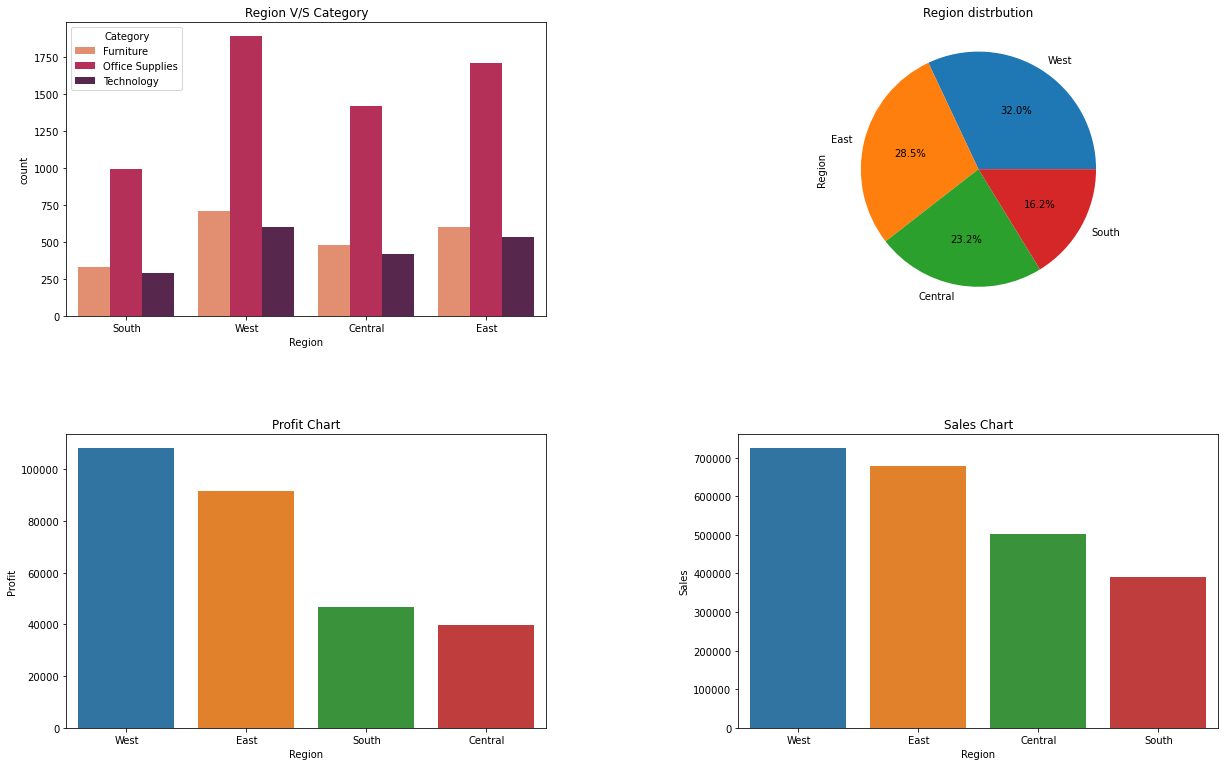

In [23]:
# visualizing distribution b/w Region and Category
plt.figure(figsize=(20,7))
plot_pieBar(col='Region', df=retail_df, bar=True, hue_='Category', sub=221)
#------------------------------------
plot_xy(x='Region', y='Profit', df=retail_df, sub=223)
plt.title('Profit Chart')
#------------------------------------
plot_xy(x='Region', y='Sales', df=retail_df, sub=224)
plt.title('Sales Chart')
# set the spacing between subplots 
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=1.5,  
                    wspace=0.4,  
                    hspace=0.4) 
plt.show()

* 1) `Western Region` have more Sales and `Southern Region` have lesser no: deals.
* 2) `Western region` is making more profit, and `central region` is the less profit making region in U.S.A
* 3) `office supplies` are more in demand and `Technology product` are less in demand

### 1) States vs Profit/Sales/Discount Charts

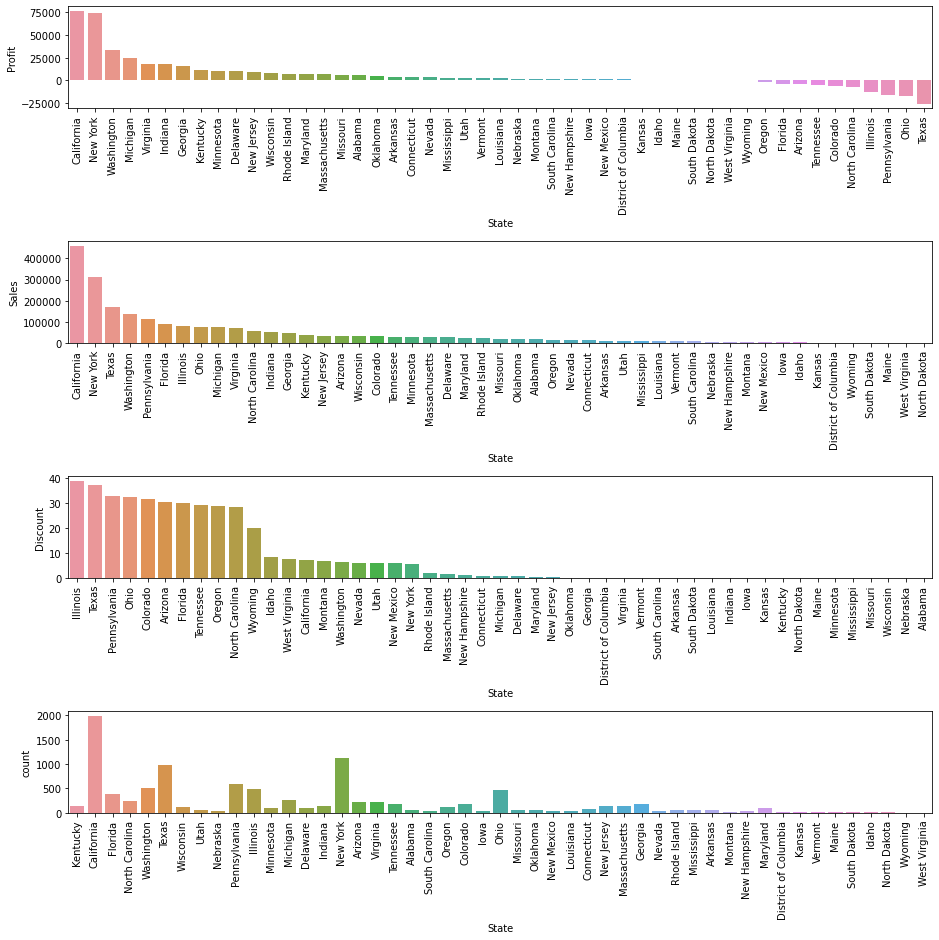

In [24]:
plt.figure(figsize=(15,8))
plot_xy(x='State', y='Profit', df=retail_df, sub=411, rotate=True)
#-------------------------------------
plot_xy(x='State', y='Sales', df=retail_df, sub=412, rotate=True)
#------------------------------------
plot_xy(x='State', y='Discount', df=retail_df, sub=413, rotate=True, mode='mean')
#------------------------------------
plt.subplot(414)
sns.countplot(x='State', data=retail_df)
plt.xticks(rotation=90)
# set the spacing between subplots 
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=1.5,  
                    wspace=0.4,  
                    hspace=1.3) 
plt.show()

* From Profit chart
* 1) `California` , `New York` and `Washington` are the top 3 profit makers in the country
* 2) `Texas`, `Ohio` and `Pennsylvania` are the the top 3 loss making states
* From Sales chart
* 3) `California`, `New York` and `Texas` are top in sales, but `Texas` fails to produce profit , why?
* From Discount chart
* 4) `Texas`, `Pennsylvania` and `lllinois` are top 3 states which gives high Discount, but giving such huge discounts dont helps in making profit,  thats why `Texas` fails to make profit. `Texas` is giving large amounts as discounts so most of their revenue returns to customers as discounts.
* 5) business is not established in states of `Wyoming` and `West Verginia`.

### 2) Discount v/s Quantity

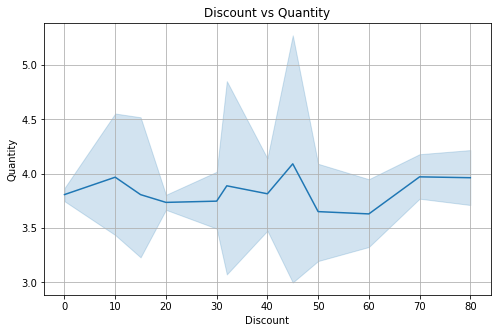

In [25]:
# line plot
plt.figure(figsize=(8,5))
sns.lineplot(x=retail_df["Discount"]*100 ,y=retail_df["Quantity"])
plt.title("Discount vs Quantity")
plt.grid()

### 3) Discount v/s Profit

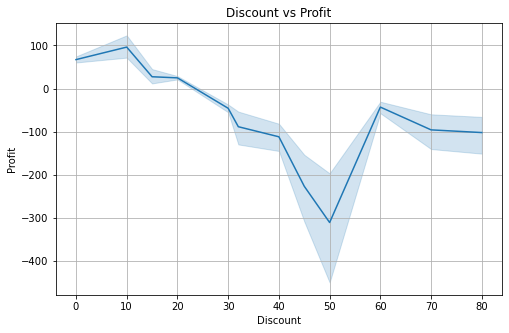

In [26]:
# line plot
plt.figure(figsize=(8,5))
sns.lineplot(x=retail_df["Discount"]*100 ,y=retail_df["Profit"])
plt.title("Discount vs Profit")
plt.grid()

### 4) Quantity V/S Sales

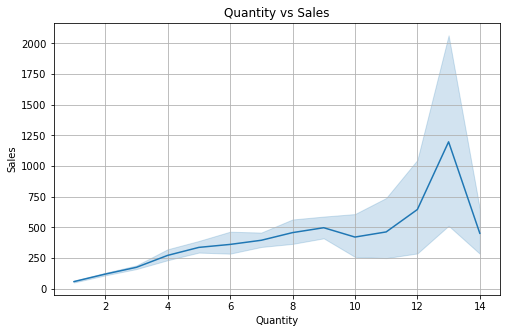

In [27]:
plt.figure(figsize=(8,5))
sns.lineplot(x=retail_df["Quantity"] ,y=retail_df["Sales"])
plt.title("Quantity vs Sales")
plt.grid()

### 5) Quantity V/S Profit

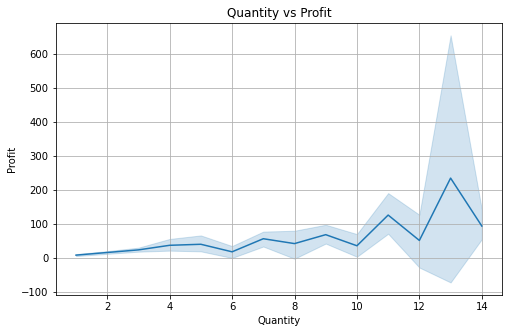

In [28]:
plt.figure(figsize=(8,5))
sns.lineplot(x=retail_df["Quantity"] ,y=retail_df["Profit"])
plt.title("Quantity vs Profit")
plt.grid()

<u><em>Conclution</em></u>
* 1) `California` , `New York` and `Washington` is the states where the business is more successful
* 2) Business is not established in states of `Wyoming` and `West Verginia`
* 3) `Profit` doesnot increases as the `Discount` % increases, but an increase in `profit` and `Sales` can be noticed when `Quantity` increases.
* 4) Business have to imporve in `southern` regions
* 5) should take care while giving `Discount`, more `Discount` willnot improve sales and profit

<strong><em style='color:#0000FF'>## THE END ##</em></strong>